In [1]:
from mne.decoding import Vectorizer
import os
import pickle
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn import metrics
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
os.chdir('/media/ning/UBUNTU 17_0/neural net')

In [3]:
X_validation,y_validation = pickle.load(open('data/validation/validation.p','rb'))

X_train,y_train = [],[]
for ii in range(10):
    X_train_,y_train_ = pickle.load(open('data/train/train%d.p'%(ii),'rb'))
    X_train.append(X_train_)
    y_train.append(y_train_)
    del X_train_,y_train_
X_train = np.concatenate(X_train,axis=0)
y_train = np.concatenate(y_train,axis=0)

In [4]:
def make_clf():
    clf = []
    clf.append(('vectorizer',Vectorizer()))
    clf.append(('estimator',RandomForestClassifier(n_estimators=50,max_depth=50,random_state=12345)))
    clf = Pipeline(clf)
    return clf

             precision    recall  f1-score   support

          0       0.80      0.84      0.82       614
          1       0.85      0.76      0.80       599

avg / total       0.82      0.80      0.81      1213

             precision    recall  f1-score   support

          0       0.76      0.90      0.83       614
          1       0.89      0.67      0.77       599

avg / total       0.83      0.79      0.80      1213

             precision    recall  f1-score   support

          0       0.77      0.88      0.82       614
          1       0.88      0.71      0.78       599

avg / total       0.82      0.80      0.80      1213

             precision    recall  f1-score   support

          0       0.81      0.84      0.82       614
          1       0.84      0.77      0.80       599

avg / total       0.82      0.80      0.81      1213

             precision    recall  f1-score   support

          0       0.80      0.84      0.82       614
          1       0.83      0.76 

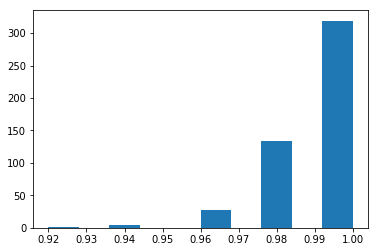

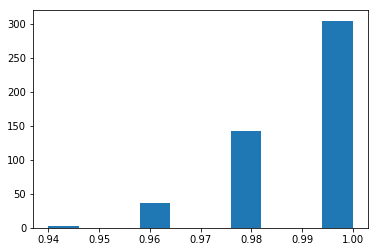

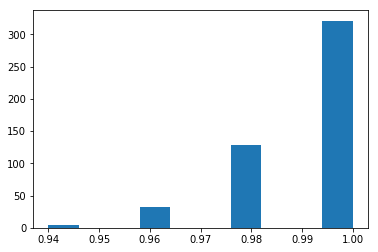

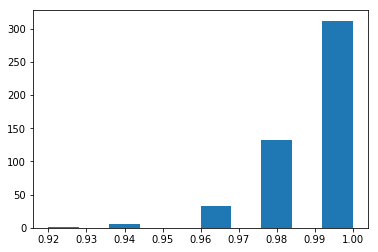

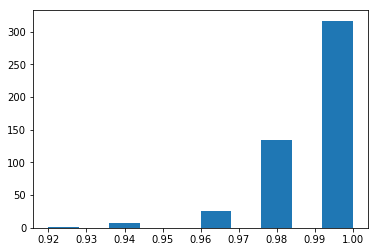

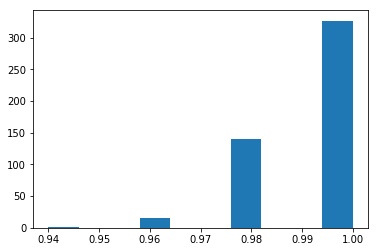

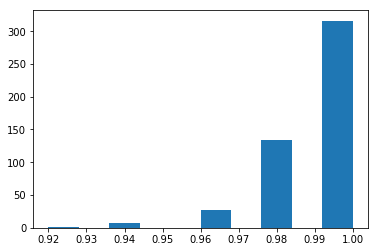

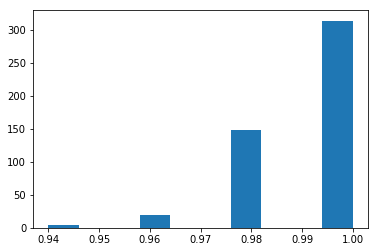

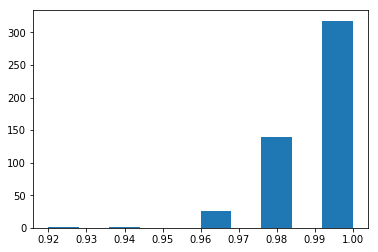

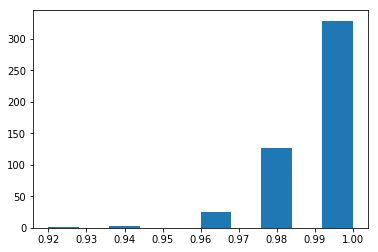

In [13]:
clf = make_clf()
for ii in range(10):
    X_train_,y_train_ = pickle.load(open('data/train/train%d.p'%(ii),'rb'))
    random_inputs = np.random.rand(X_train_.shape[0],32,16,192)
    random_labels = [0]*X_train_.shape[0]
    random_labels = np_utils.to_categorical(random_labels,2)
    X_train_ = np.concatenate([X_train_,random_inputs],axis=0)
    y_train_ = np.concatenate([y_train_,random_labels],axis=0)
    clf.fit(X_train_,y_train_)
    pred_ = clf.predict(X_validation)
    print(metrics.classification_report(y_validation,pred_))
    plt.figure()
    plt.hist(clf.predict_proba(random_inputs)[0][:,-1])

             precision    recall  f1-score   support

          0       0.89      0.73      0.80       614
          1       0.78      0.89      0.83       599

avg / total       0.83      0.81      0.82      1213

             precision    recall  f1-score   support

          0       0.83      0.82      0.83       614
          1       0.83      0.82      0.82       599

avg / total       0.83      0.82      0.83      1213

             precision    recall  f1-score   support

          0       0.85      0.82      0.84       614
          1       0.84      0.85      0.84       599

avg / total       0.84      0.83      0.84      1213

             precision    recall  f1-score   support

          0       0.88      0.78      0.83       614
          1       0.81      0.88      0.84       599

avg / total       0.85      0.83      0.83      1213

             precision    recall  f1-score   support

          0       0.89      0.77      0.82       614
          1       0.80      0.87 

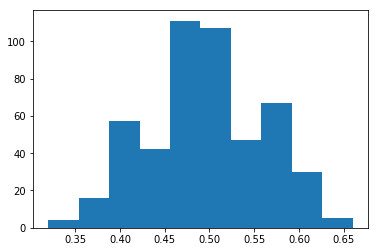

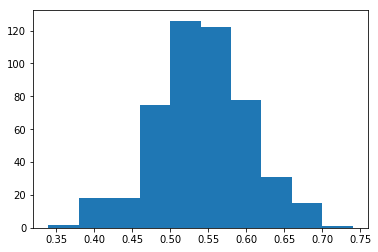

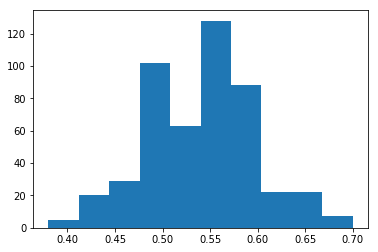

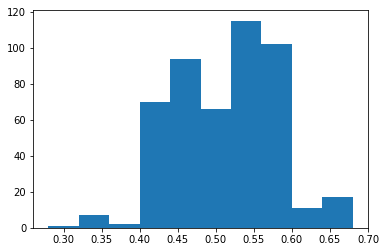

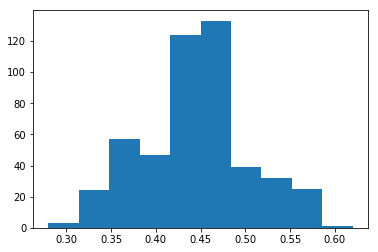

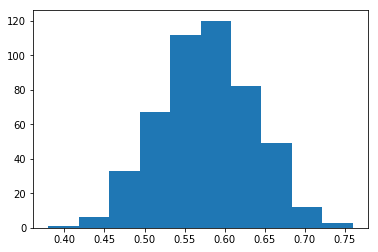

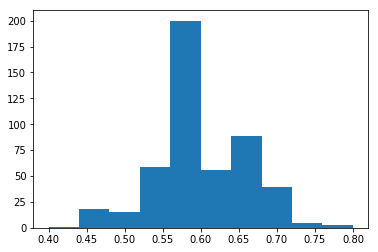

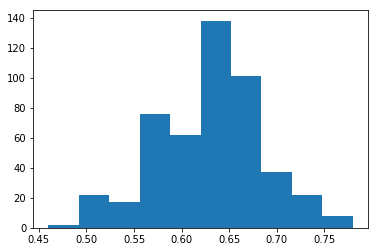

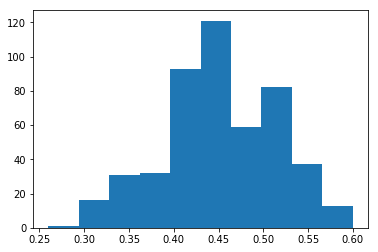

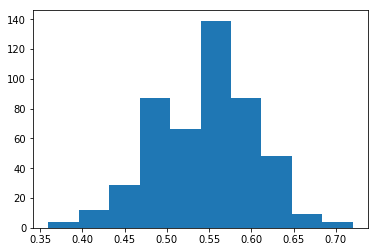

In [14]:
clf = make_clf()
for ii in range(10):
    X_train_,y_train_ = pickle.load(open('data/train/train%d.p'%(ii),'rb'))
    random_inputs = np.random.rand(X_train_.shape[0],32,16,192)
    #random_labels = [0]*X_train_.shape[0]
    #random_labels = np_utils.to_categorical(random_labels,2)
    #X_train_ = np.concatenate([X_train_,random_inputs],axis=0)
    #y_train_ = np.concatenate([y_train_,random_labels],axis=0)
    clf.fit(X_train_,y_train_)
    pred_ = clf.predict(X_validation)
    print(metrics.classification_report(y_validation,pred_))
    plt.figure()
    plt.hist(clf.predict_proba(random_inputs)[0][:,-1])